In [40]:
import sys
sys.path.append('/home/samjhall/github/XASNet-XAI/src')


import torch

from XASNet.models import XASNet_GNN
from XASNet.utils import GraphDataProducer
from XASNet.utils.visualisation import plot_prediction
from XASNet.utils.rse import rse_predictions, rse_loss, rse_histogram

In [26]:
test_go = torch.load('./XASNet-data/test_mol_dataset.pt')

In [35]:
test_go[1].idx

tensor([134])

In [28]:
xasnet_gnn = XASNet_GNN(
    gnn_name = 'gcn',
    in_channels = [10, 100, 200, 300],
    out_channels = [100, 200, 300, 300],
    num_targets = 200,
    num_layers = 4,
    heads = 1
).to(device)

path_to_model = osp.join('./best_model/xasnet_model.pt')

if osp.exists(path_to_model):
    xasnet_gnn.load_state_dict(torch.load(path_to_model))
else:
    print('Model is not loaded.')

In [36]:
mol_idx = 134
graph_picker = GraphDataProducer(
    model=xasnet_gnn,
    gnn_type="gcn",
    test_data=test_go,
    idx_to_pick=mol_idx
)
graph = graph_picker.picked_graph

In [37]:
graph

Data(x=[32, 10], edge_index=[2, 82], edge_attr=[82, 6], spectrum=[200], idx=[1], smiles='[c:0]12[c:2]3[cH:3][cH:5][c:6]4[c:4]1[c:8]1[c:12]5[c:16]6[c:20]2[CH:22]([C:21]([C:24](=[O:28])[OH:29])=[CH:19][C:18]6([CH:25]=[O:31])[CH:17]=[CH:15][CH:14]5[CH:13]2[CH:11]([CH:10]1[CH:9]1[CH:7]4[O:26]1)[O:30]2)[CH:23]1[CH:1]3[O:27]1', batch=[32])

In [38]:
y_true = graph.spectrum
x_pred, y_pred = graph_picker.predictions()

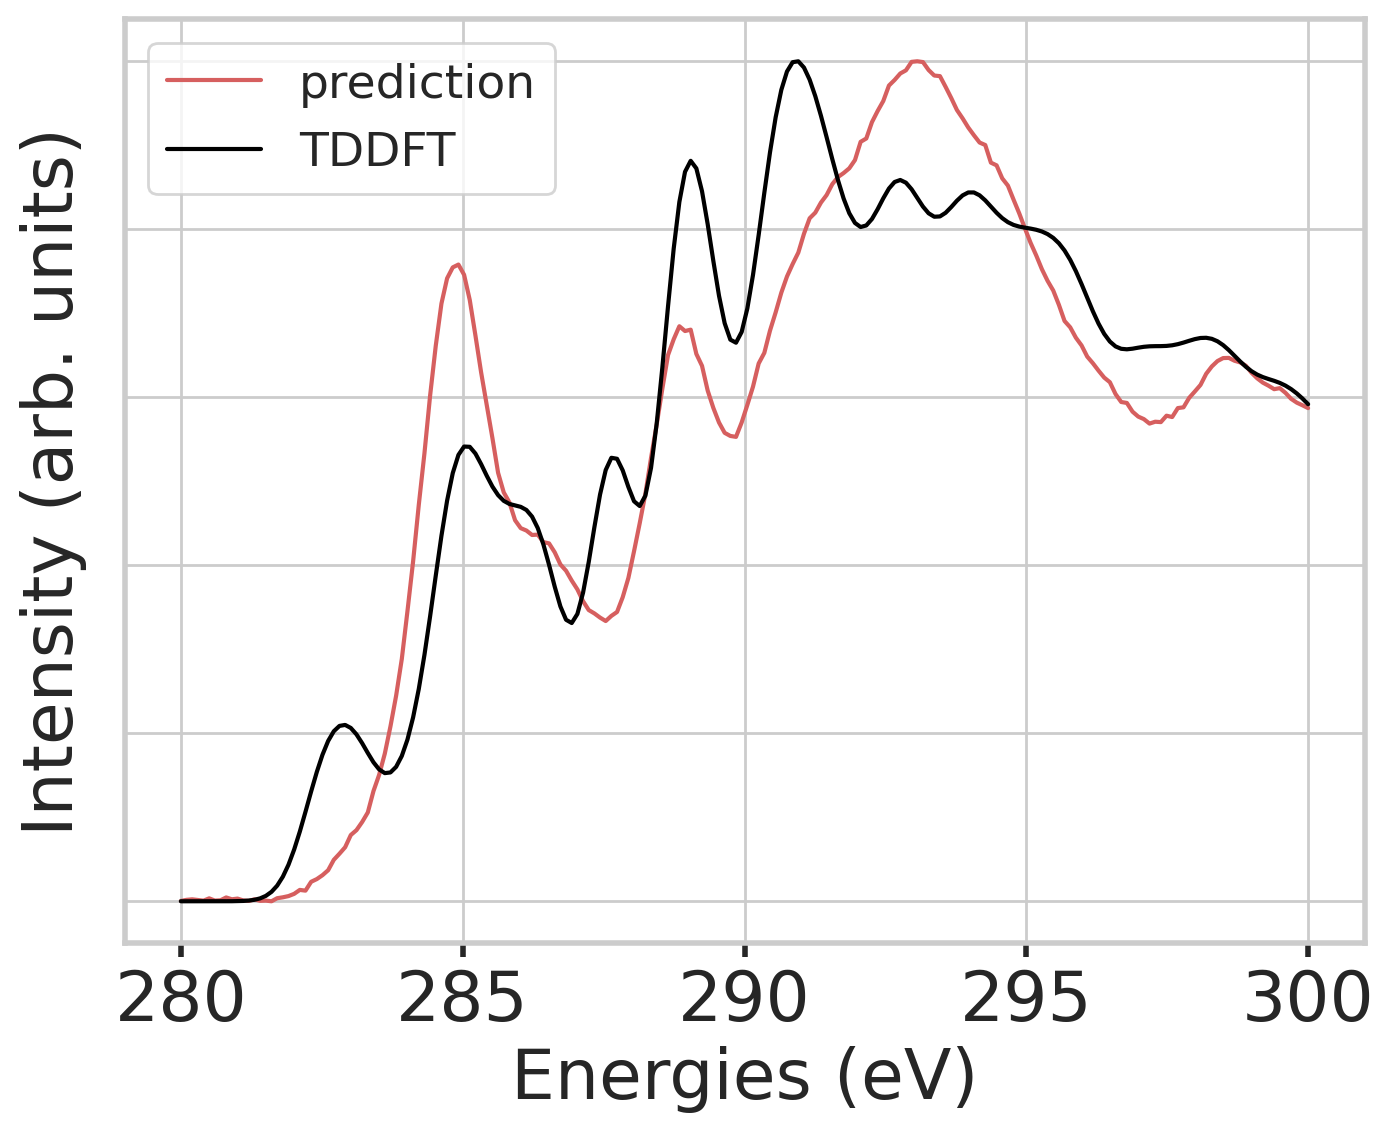

In [39]:
plot_prediction(x_pred,
                y_pred,
                y_true,
                normalise=True,
                add_peaks=False,
                save=False)

In [42]:
rse_dict = rse_predictions(xasnet_gnn, test_go, graphnet=False)

In [43]:
rse_dict = {k: v.numpy() for k, v in rse_dict.items() if v < 1}

In [44]:
rse_loss(y_pred, y_true)

tensor(0.0276, dtype=torch.float64)

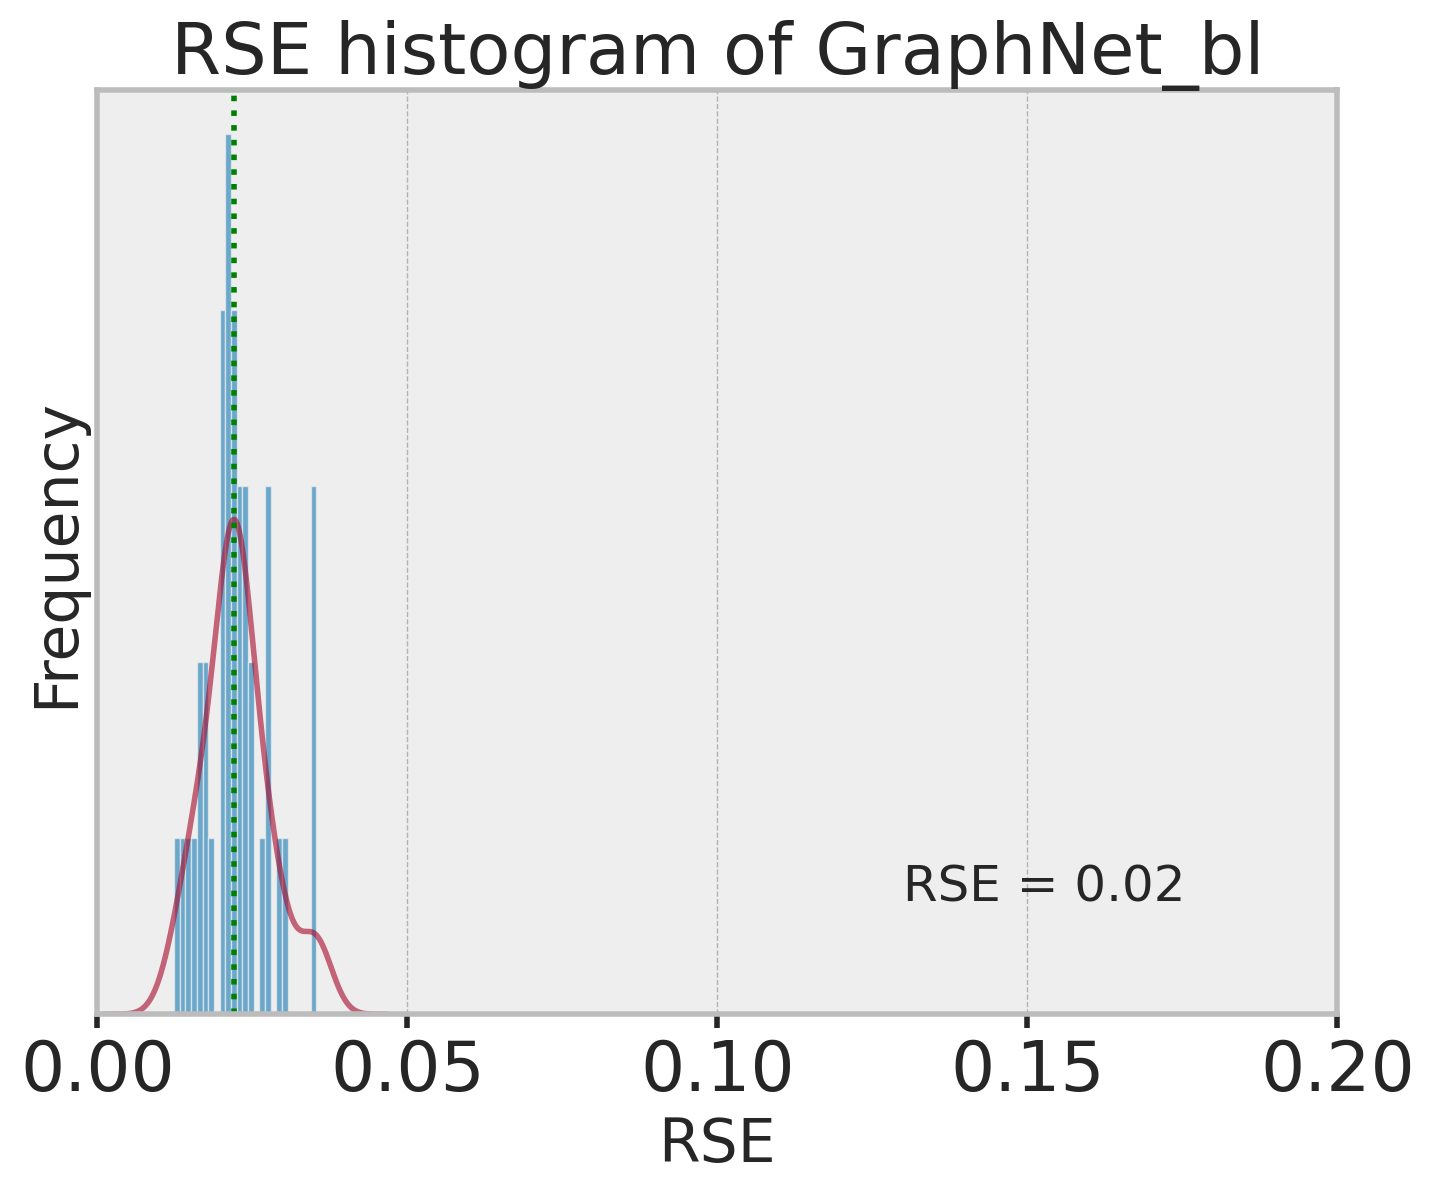

In [49]:
rse_histogram(list(rse_dict.values()), 
              bins=25, 
              quantiles=False,
              model_name="GraphNet_bl", 
              save=False)

In [52]:
for k, v in rse_dict.items():
    if v > 0.0 and v < 0.2:
        print(k, v)

tensor([238]) 0.023049229861569
tensor([134]) 0.027556510782846894
tensor([28]) 0.0213691522012874
tensor([44]) 0.01658055518424867
tensor([71]) 0.012370239772316272
tensor([231]) 0.02149200265952478
tensor([299]) 0.03530634101588658
tensor([115]) 0.027179958839462642
tensor([9]) 0.021083268051989915
tensor([154]) 0.024089625338573534
tensor([274]) 0.021771246652741338
tensor([113]) 0.022203067044696635
tensor([79]) 0.020311636883380463
tensor([236]) 0.03522978865490811
tensor([22]) 0.01749720858247678
tensor([120]) 0.015856797206065223
tensor([188]) 0.02509019345007583
tensor([163]) 0.029826207395251617
tensor([18]) 0.026317855462501764
tensor([204]) 0.013685605444425241
tensor([196]) 0.02445224011393289
tensor([171]) 0.017380705593551662
tensor([301]) 0.02293853071066826
tensor([281]) 0.02244427392866655
tensor([271]) 0.02221244361383541
tensor([20]) 0.02062037330055393
tensor([267]) 0.023089952706575424
tensor([207]) 0.02961176244004298
tensor([132]) 0.021107356533352037
tensor([3])